# ***Downgrading keras, tensorflow and scipy due to some compatibility issues***

In [1]:
!pip install keras==2.2.2
!pip install scipy==1.1.0

     |████████████████████████████████| 307kB 2.8MB/s 
     |████████████████████████████████| 51kB 7.1MB/s 
ERROR: tensorflow 2.3.0 has requirement keras-preprocessing<1.2,>=1.1.1, but you'll have keras-preprocessing 1.0.2 which is incompatible.
  Found existing installation: Keras-Preprocessing 1.1.2
    Uninstalling Keras-Preprocessing-1.1.2:
      Successfully uninstalled Keras-Preprocessing-1.1.2
  Found existing installation: Keras 2.4.3
    Uninstalling Keras-2.4.3:
      Successfully uninstalled Keras-2.4.3
     |████████████████████████████████| 31.2MB 152kB/s 
ERROR: umap-learn 0.4.6 has requirement scipy>=1.3.1, but you'll have scipy 1.1.0 which is incompatible.
ERROR: tensorflow 2.3.0 has requirement keras-preprocessing<1.2,>=1.1.1, but you'll have keras-preprocessing 1.0.2 which is incompatible.
ERROR: tensorflow 2.3.0 has requirement scipy==1.4.1, but you'll have scipy 1.1.0 which is incompatible.
ERROR: plotnine 0.6.0 has requirement scipy>=1.2.0, but you'll have scipy 1

In [2]:
!pip install tensorflow==1.10.0

     |████████████████████████████████| 58.4MB 65kB/s 
     |████████████████████████████████| 573kB 35.7MB/s 
     |████████████████████████████████| 12.2MB 46.6MB/s 
     |████████████████████████████████| 3.3MB 37.5MB/s 
ERROR: xarray 0.15.1 has requirement numpy>=1.15, but you'll have numpy 1.14.5 which is incompatible.
ERROR: xarray 0.15.1 has requirement setuptools>=41.2, but you'll have setuptools 39.1.0 which is incompatible.
ERROR: umap-learn 0.4.6 has requirement numpy>=1.17, but you'll have numpy 1.14.5 which is incompatible.
ERROR: umap-learn 0.4.6 has requirement scipy>=1.3.1, but you'll have scipy 1.1.0 which is incompatible.
ERROR: tifffile 2020.9.3 has requirement numpy>=1.15.1, but you'll have numpy 1.14.5 which is incompatible.
ERROR: spacy 2.2.4 has requirement numpy>=1.15.0, but you'll have numpy 1.14.5 which is incompatible.
ERROR: seaborn 0.11.0 has requirement numpy>=1.15, but you'll have numpy 1.14.5 which is incompatible.
ERROR: plotnine 0.6.0 has requirement n

# ***Loading VGG16 model without weights from keras***

In [3]:
from keras.models import load_model
from keras.applications.vgg16 import VGG16
vggmodel = VGG16(weights=None, include_top=True)

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarn

# ***Freezing first 19 layers in VGG16 model***

In [4]:
for layers in (vggmodel.layers)[:19]:
    print(layers)
    layers.trainable = False

# ***Importing libraries for model initialization***

In [5]:
import keras
from keras.models import Model
from keras.layers import Dense
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image

In [6]:
X= vggmodel.layers[-2].output
predictions = Dense(2, activation="softmax", name = 'predictions')(X)
model_final = Model(inputs = vggmodel.input, outputs = predictions)

In [7]:
cd drive/My Drive/Task

/content/drive/My Drive/Task


# ***Loading Model weights trained previously***

In [8]:
model_final.load_weights('vgg16_1.h5')

In [11]:
cd ..

/content


# ***Predicting output on a sample image, here:***
# ***0_index = Cat***
# ***1_index = Dog***

In [13]:
import numpy as np
img = image.load_img("dog.jpg",target_size=(224,224))
img = np.expand_dims(img, axis=0)
output = model_final.predict(img)
output

array([[6.6163973e-04, 9.9933833e-01]], dtype=float32)

In [14]:
import matplotlib.pyplot as plt

# ***Plotting Sample Image***

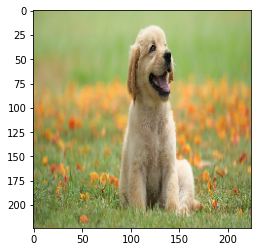

In [15]:
img = image.load_img("dog.jpg",target_size=(224,224))
plt.imshow(img)
plt.show()

# ***Changing the last layer activation from softmax to linear***

In [17]:
from vis.utils import utils
layer_idx = utils.find_layer_idx(model_final, 'predictions')
model_final.layers[layer_idx].activation = keras.activations.linear
model_final = utils.apply_modifications(model_final)

/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:269: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


# ***Using the function visualize_cam to visualize the GRAD-CAM***

In [18]:
from vis.visualization import visualize_cam
penultimate_layer_idx = utils.find_layer_idx(model_final, "block5_conv3") 
class_idx  = class_idxs_sorted[0]
seed_input = img
grad_top1  = visualize_cam(model_final, layer_idx, class_idx, seed_input, 
                           penultimate_layer_idx = penultimate_layer_idx,#None,
                           backprop_modifier     = None,
                           grad_modifier         = None)

# ***Common Plotter Function for GRAD-CAM and Saliency Maps***

# ***GRAD-CAM Visualization***

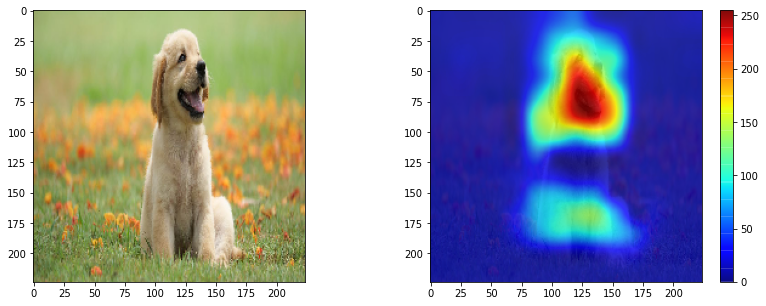

In [19]:
def plot_map(grads):
    img = image.load_img("dog.jpg",target_size=(224,224))
    fig, axes = plt.subplots(1,2,figsize=(14,5))
    axes[0].imshow(img)
    axes[1].imshow(img)
    i = axes[1].imshow(grads,cmap="jet",alpha=0.8)
    fig.colorbar(i)
plot_map(grad_top1)

# ***Saliency Maps Visualization***

# ***Calculating Gradients for Saliency Map (Credits: Yumi)***

In [20]:
import keras.backend as K
from keras.preprocessing.image import load_img, img_to_array
from keras.applications.vgg16 import VGG16, preprocess_input
_img = load_img("dog.jpg",target_size=(224,224))
img               = img_to_array(_img)
img               = preprocess_input(img)
class_idx         = class_idxs_sorted[0]
layer_input       = model_final.input
loss              = model_final.layers[layer_idx].output[...,class_idx]
grad_tensor       = K.gradients(loss,layer_input)[0]

derivative_fn     = K.function([layer_input],[grad_tensor])

grad_eval_by_hand = derivative_fn([img[np.newaxis,...]])[0]
print(grad_eval_by_hand.shape)


grad_eval_by_hand = np.abs(grad_eval_by_hand).max(axis=(0,3))

arr_min, arr_max  = np.min(grad_eval_by_hand), np.max(grad_eval_by_hand)
grad_eval_by_hand = (grad_eval_by_hand - arr_min) / (arr_max - arr_min + K.epsilon())


(1, 224, 224, 3)


# ***Plotting Saliency Maps***

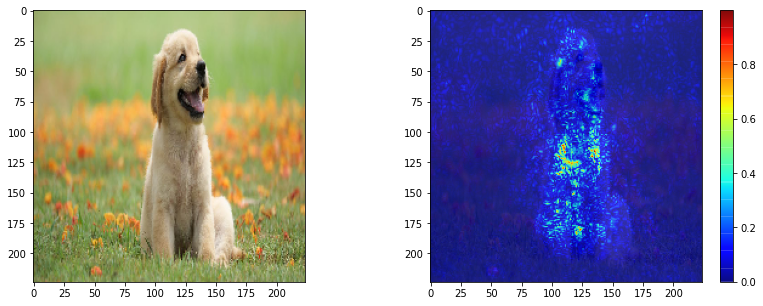

In [21]:
plot_map(grad_eval_by_hand)